In [ ]:
from scipy.integrate import odeint #odeint es laparte de Scipy que permite resolver EDO's
from pylab import *
import numpy as np

La ecuación a resolver es
\begin{equation}
m\frac{d^2x}{dt^2}=F_0\cos(\omega t)-b\frac{dx}{dt}-kx
\end{equation}
Sin embargo, Scipy solo puede resolver sistemas de ecuaciones diferenciales de primer orden. Entonces conviene reescribir la ecuación anterior como un sistema de EDO's acopladas:
\begin{equation}
\frac{dv}{dt}=\frac{F_0}{m}\cos(\omega t)-\frac{b}{m}v-\frac{k}{m}x\\
\frac{dx}{dt}=v
\end{equation}
Sea $S=(x,v)$

In [ ]:
T=linspace(0,20,1000)

In [ ]:
def solucionScipy(F0,w,b,k,m,x0,v0): #argumentos (en orden) F0, omega, b, k, m, posición inicial, velocidad inicial
  def dSdt(S,t):  #Esta es la función que describe el sistema de EDO's
    x,v=S
    return [v,F0/m*cos(w*t)-b/m*v-k/m*x]
  S0=(x0,v0) #Condiciones iniciales en forma de un vector
  solucion=odeint(dSdt,S0,T) #
  x,v=solucion.T
  return x

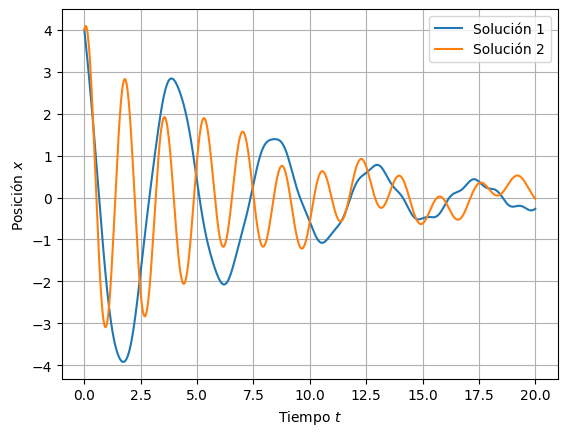

In [ ]:
#Se procede a graficar las soluciones que da Scipy para las ecuaciones diferenciales con los
#mismos parámetros empleados para ver las soluciones en Sympy
x1=solucionScipy(2,6,0.3,2,1,4,-5)
x2=solucionScipy(4,1,0.3,13,1,4,3)
plot(T,x1,label='Solución 1')
plot(T,x2,label='Solución 2')
grid(True)
xlabel('Tiempo $t$')
ylabel('Posición $x$')
legend()

Se observa que las graficas lucen muy similares a las obtenidas en Sympy. Para asegurar que ambos resultados coinciden se presentará en una misma figura las gráficas que nos arroja Sympy y Scipy para la misma ecuación diferencial, con valores:
$F_0=2,\omega=6,b=0.3,k=2,m=1,x_0=4,v_0=-5$

In [ ]:
dataSympy=np.loadtxt('datosSympy1.txt',unpack=True)
#Lo que se hizo fue obtener de un archivo txt, los datos que nos arrojó la función solucionSympy
#hecha en el otro notebook

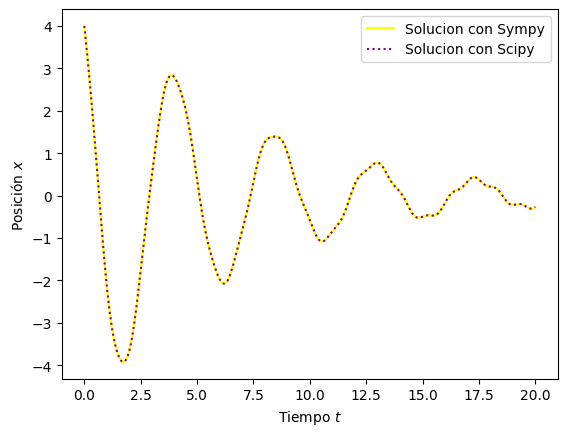

In [ ]:
plot(T,dataSympy,color='yellow',linestyle='-',label='Solucion con Sympy')
plot(T,x1,color='purple',linestyle=':',label='Solucion con Scipy')
xlabel('Tiempo $t$')
ylabel('Posición $x$')
legend()